In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [19]:
df = pd.read_csv('../data/cleaned.csv')


In [20]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [21]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter1_int  letter

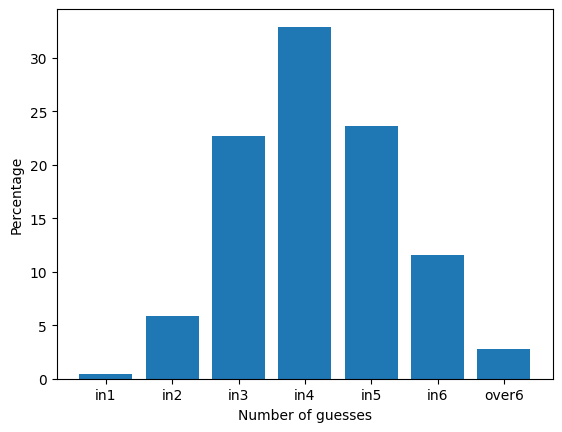

In [22]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')


plt.show()

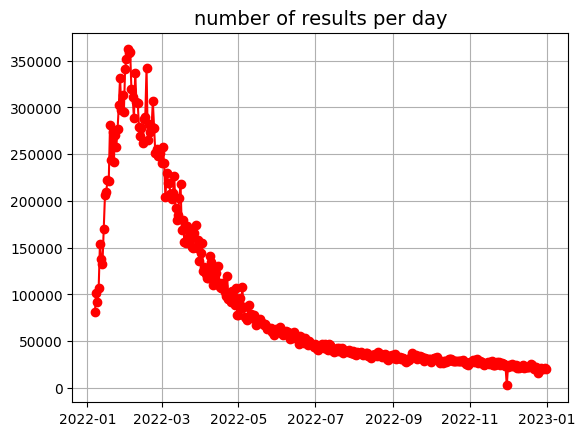

In [23]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


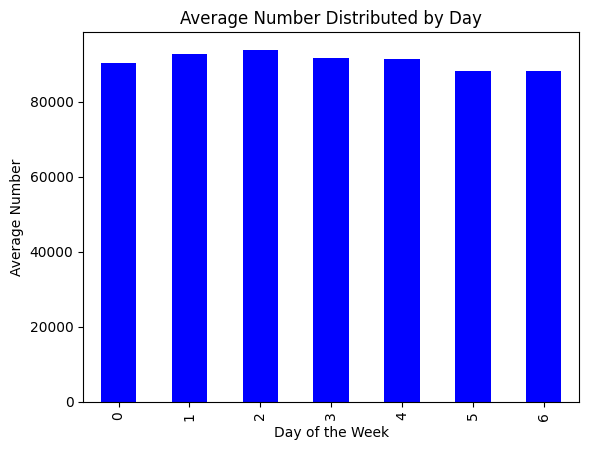

In [24]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [25]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



21:41:15 - cmdstanpy - INFO - Chain [1] start processing
21:41:15 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
719,2023-12-27,-20975.979224,-9.687052e+05,976489.641713,-967524.053673,964756.368435,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,-17761.609528
720,2023-12-28,-21089.701089,-9.725566e+05,966288.080312,-974606.160822,968285.761708,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,1455.409403,0.0,0.0,0.0,-19634.291687
721,2023-12-29,-21203.422955,-9.939542e+05,973116.009084,-980781.670433,971815.154981,426.101618,426.101618,426.101618,426.101618,426.101618,426.101618,0.0,0.0,0.0,-20777.321337
722,2023-12-30,-21317.144820,-9.970107e+05,973373.703289,-986178.692424,975344.548253,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,-2460.785129,0.0,0.0,0.0,-23777.929949
723,2023-12-31,-21430.866685,-1.001968e+06,983980.873846,-991371.006778,980682.963478,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,-3393.913594,0.0,0.0,0.0,-24824.780280


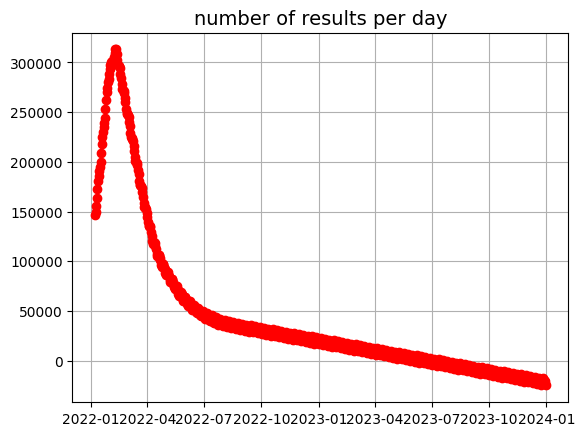

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-43241.096279,78320.888813,-44165.774841,73650.06984,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [26]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


21:41:16 - cmdstanpy - INFO - Chain [1] start processing
21:41:16 - cmdstanpy - INFO - Chain [1] done processing


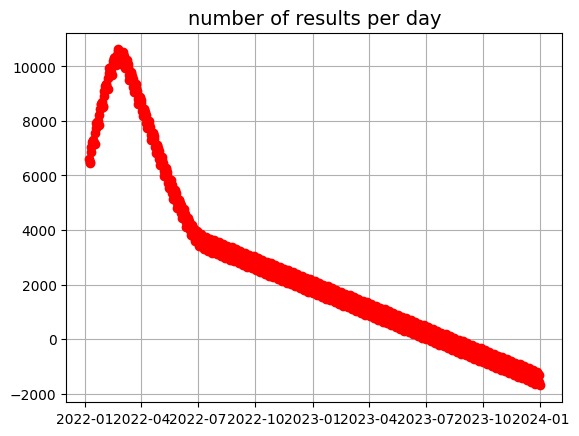

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-261.775888,3584.453553,486.270647,2453.945777,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [27]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


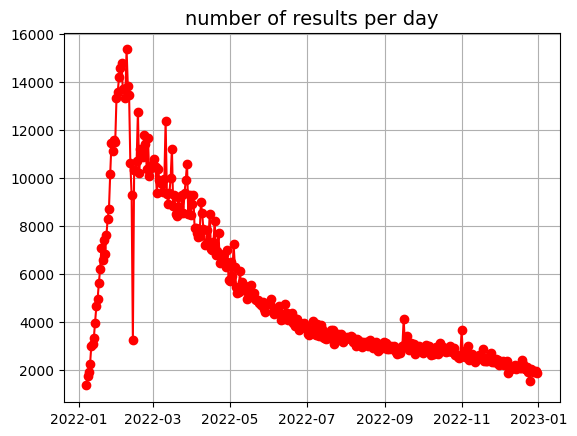

In [28]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [29]:
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter1_int  letter

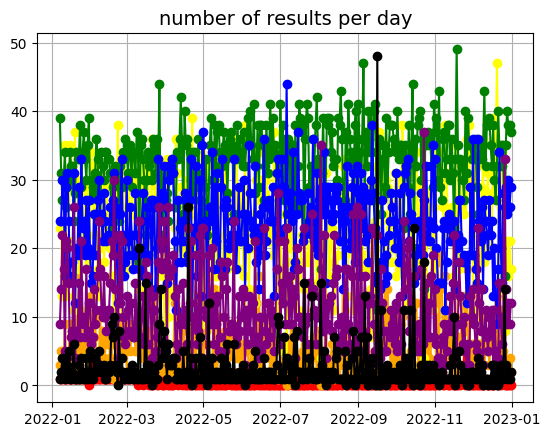

In [30]:
plt.plot(df['date'], df['in1'], color='red', marker='o')
plt.plot(df['date'], df['in2'], color='orange', marker='o')
plt.plot(df['date'], df['in3'], color='yellow', marker='o')
plt.plot(df['date'], df['in4'], color='green', marker='o')
plt.plot(df['date'], df['in5'], color='blue', marker='o')
plt.plot(df['date'], df['in6'], color='purple', marker='o')
plt.plot(df['date'], df['over6'], color='black', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


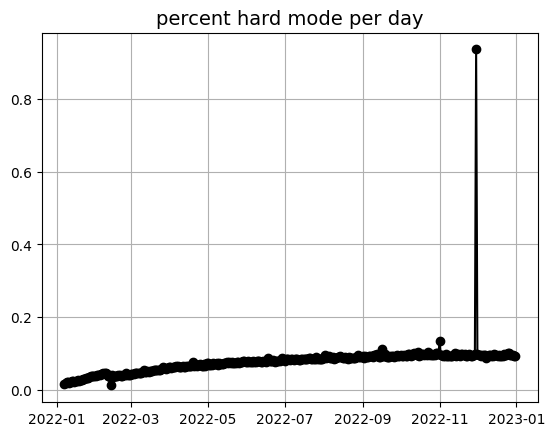

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,word_score,word_occurrence,vowels,repeats,percent_hard
31,2022-11-30,529,study,2569,2405,0,6,30,33,19,...,20,21,4,25,4.03,1.284955,0.081434,1,1,0.936162


In [31]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], color='black', marker='o')
plt.title('percent hard mode per day', fontsize=14)
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


Cluster 0
Mean word score results: 1.6004868111038286
Mean average number of guesses: 3.761578947368421
Mean word occuraence: 0.027392642570865364


Cluster 1
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occuraence: 0.012115481664328675


Cluster 2
Mean word score results: 1.3261015574798813
Mean average number of guesses: 4.72875
Mean word occuraence: 0.005450028919988113




c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_24184\3992753031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


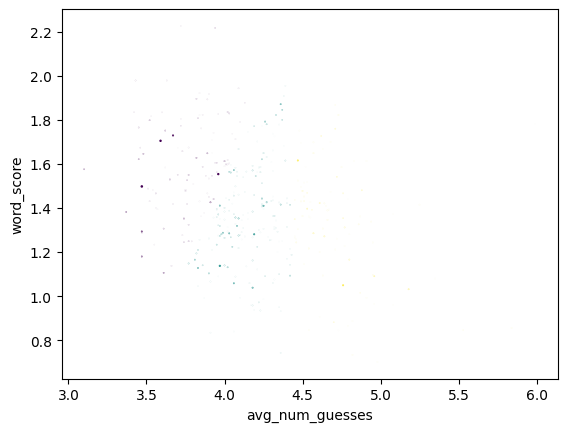

In [32]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

plt.scatter(df_kmeans['avg_num_guesses'],
            df_kmeans['word_score'], 
            df_kmeans['word_occurrence'],
            c=df_kmeans['cluster'])
plt.xlabel('avg_num_guesses')
plt.ylabel('word_score')
plt.show()


In [33]:
from scipy import stats
import numpy as np

# assuming your data is stored in a numpy array called "data"
# and the columns are ordered 1, 2, 3, ..., 7+

# calculate the Shapiro-Wilk test statistic and p-value
x = df[['in1','in2','in3','in4','in5','in6','over6']]

x = x.values.flatten()
result = stats.kstest(x, dist='gumbel')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


TypeError: kstest() got an unexpected keyword argument 'dist'

Fitting 110 distributions:  15%|█▌        | 17/110 [00:29<06:39,  4.30s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 110 distributions:  16%|█▋        | 18/110 [00:30<05:00,  3.27s/it]SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
Fitting 110 distributions:  20%|██        | 22/110 [00:30<01:46,  1.21s/it]SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 110 distributions:  22%|██▏       | 24/110 [00:30<01:07,  1.28it/s]SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitting 110 distributions:  25%|██▌       | 28/110 [00:30<00:31,  2.56it/s]SKIPPED gamma distribution (taking more than 3

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,57.786442,476.574414,-230793.627499,inf,0.223439,0.0
dgamma,59.125874,470.758382,-229971.228208,inf,0.230920,0.0
laplace_asymmetric,60.356067,460.828584,-229232.150907,inf,0.177112,0.0
laplace,60.404959,453.401518,-229213.577992,inf,0.213464,0.0
chi,60.993901,445.797370,-228854.860777,inf,0.169561,0.0


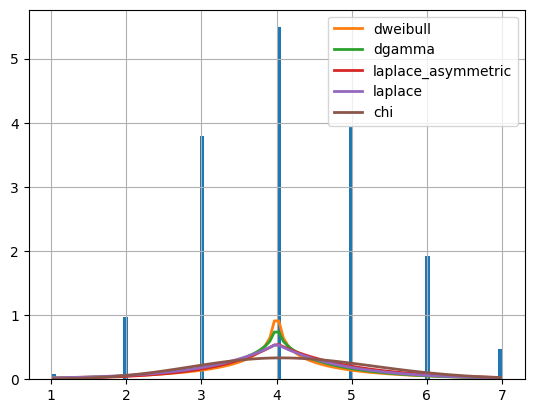

In [45]:
from fitter import Fitter, get_common_distributions, get_distributions
cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
in1 = [1 for _ in range(sum([length for length in df.in1.to_numpy()]))]
in2 = [2 for _ in range(sum([length for length in df.in2.to_numpy()]))]
in3 = [3 for _ in range(sum([length for length in df.in3.to_numpy()]))]
in4 = [4 for _ in range(sum([length for length in df.in4.to_numpy()]))]
in5 = [5 for _ in range(sum([length for length in df.in5.to_numpy()]))]
in6 = [6 for _ in range(sum([length for length in df.in6.to_numpy()]))]
over6 = [7 for _ in range(sum([length for length in df.over6.to_numpy()]))]

total_guesses = in1 + in2 + in3 + in4 + in5 + in6 + over6
result = stats.kstest(total_guesses, stats.norm.cdf)

plt.hist(total_guesses, bins = 7)
f = Fitter(total_guesses, distributions=get_distributions())
f.fit()
f.summary()


In [ ]:
print(len(total_guesses))


In [ ]:
n, bins, patches = plt.hist(total_guesses, bins=7, density=True, alpha=0.5)

# Overlay a normal distribution on top of the histogram
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(bins), max(bins), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, '--')

# Add labels and a title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')

# Display the plot
plt.show()


In [ ]:
# Create histogram
plt.hist(total_guesses, bins=7, density=True)

# Add normal distribution curve
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(total_guesses), max(total_guesses), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

# Set labels and title
plt.xlabel('Total Guesses')
plt.ylabel('Frequency')
plt.title('Histogram of Total Guesses with Normal Distribution')

# Show plot
plt.show()


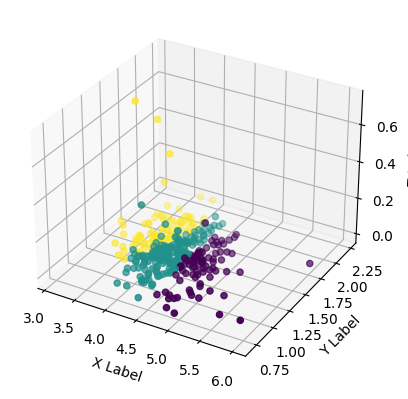

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


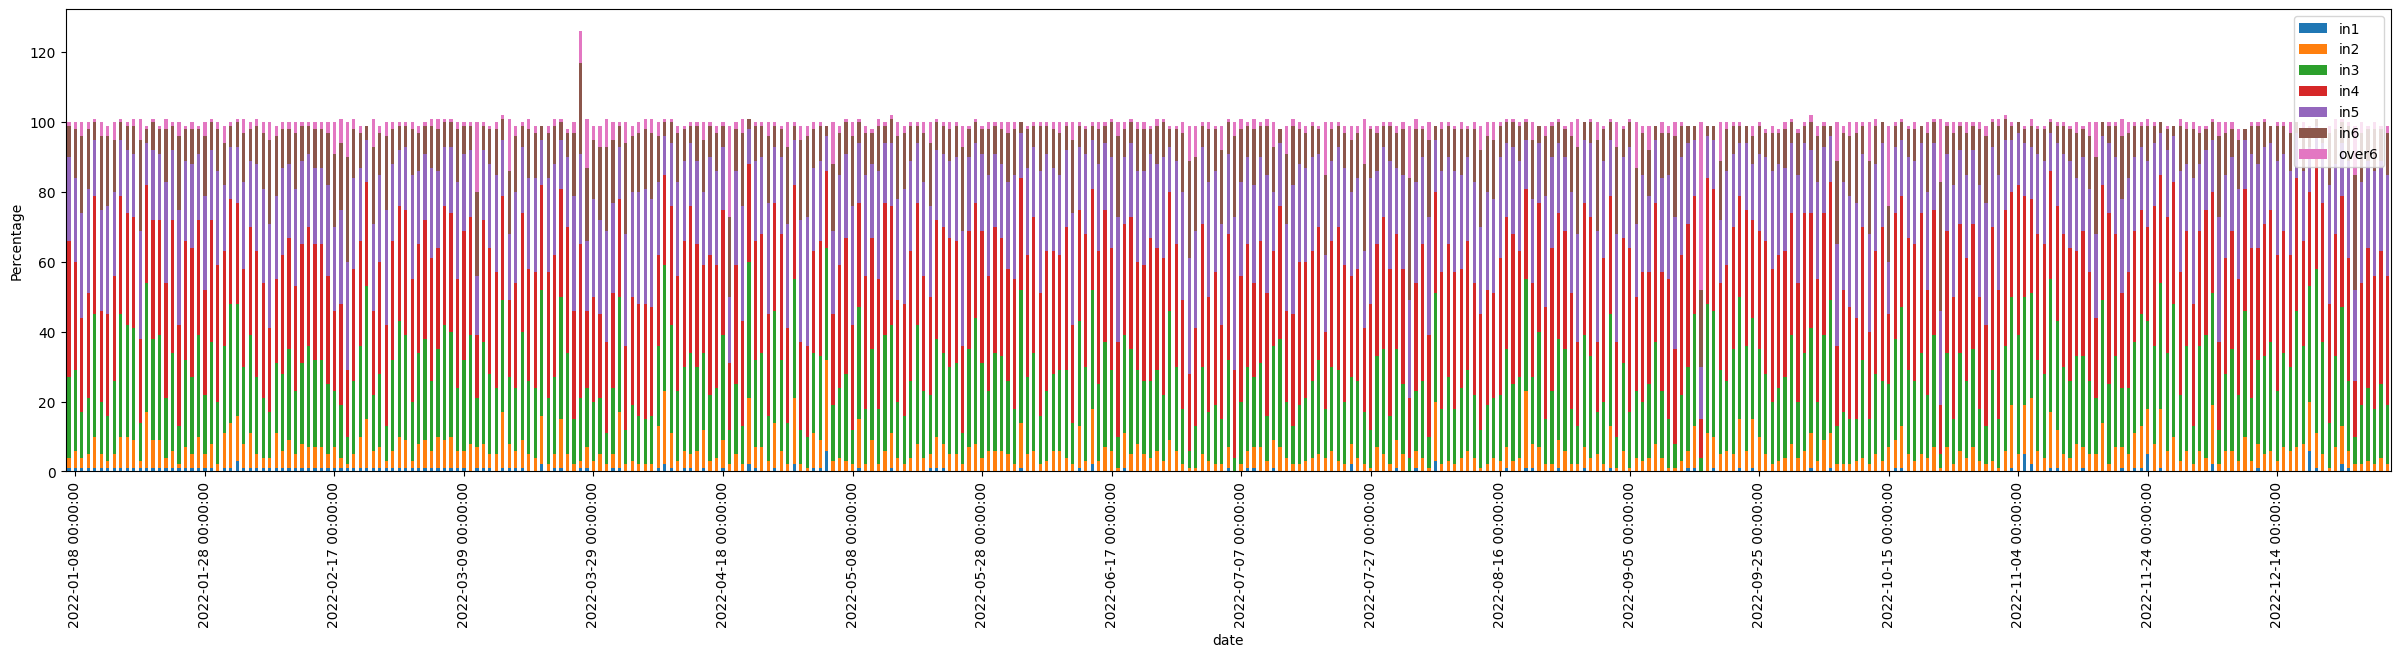

In [44]:
df_stacked_bar = df[['date', 'in1','in2','in3','in4','in5','in6','over6']]

df_stacked_bar = df_stacked_bar.set_index('date').sort_index()

# Create a stacked bar chart
df_stacked_bar.plot(kind='bar', stacked=True, figsize=(30, 6))

# Set the y-axis label to 'Percentage'
plt.ylabel('Percentage')
plt.xticks(range(1,350,20))
# Show the plot
plt.show()


In [51]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(endog=df_stacked_bar, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (359, 7).

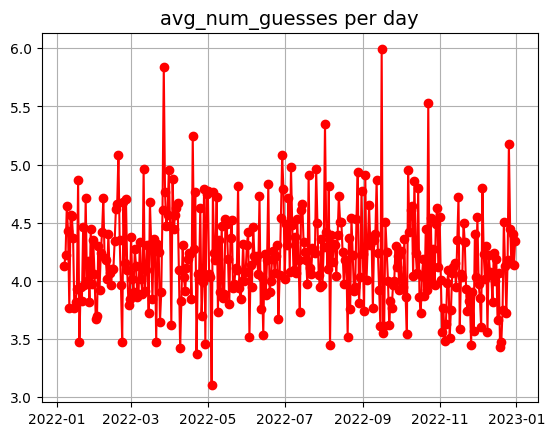

In [52]:
plt.plot(df['date'], df['avg_num_guesses'], color='red', marker='o')
plt.title('avg_num_guesses per day', fontsize=14)
plt.grid(True)
plt.show()


In [53]:
df


,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,word_score,word_occurrence,vowels,repeats,percent_hard
5,2022-12-26,555,judge,20011,2043,0,2,8,16,26,...,21,4,7,5,5.18,1.031505,0.024466,2,2,0.102094
69,2022-10-23,491,mummy,29279,3021,0,1,4,14,27,...,21,13,13,25,5.53,0.846112,0.000663,1,1,0.103180
106,2022-09-16,454,parer,37309,4130,0,0,4,11,15,...,1,18,5,18,5.99,1.780343,0.000017,2,2,0.110697
151,2022-08-02,409,coyly,34909,3380,0,0,4,17,28,...,15,25,12,25,5.35,1.079636,0.000100,1,1,0.096823
185,2022-06-29,375,gawky,45645,3957,0,1,5,22,33,...,1,23,11,25,5.08,0.960754,0.000058,1,1,0.086691
256,2022-04-19,304,foyer,108899,8198,0,2,10,19,19,...,15,25,5,18,5.25,1.415079,0.000469,2,2,0.075281
279,2022-03-27,281,nymph,165468,9935,1,2,18,44,26,...,25,13,16,8,5.84,0.856345,0.000603,0,0,0.060042
315,2022-02-19,245,swill,282327,11241,1,1,8,19,31,...,23,9,12,12,5.08,1.372400,0.000074,1,1,0.039816


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.concat((df, df_kmeans["cluster"]), axis=1)

print(df)
# Create a new column indicating the number of unique letters in each solution word
df["unique_letters"] = df["word"].apply(
    lambda x: len(set(x)))

# Split the data into training and testing sets
X = df[["unique_letters"]]
y = df["cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Classification report:")
# print(classification_report(y_test, y_pred))

# Use the model to classify the word "EERIE"
word = "EERIE"
unique_letters = len(set(word))
difficulty = clf.predict([[unique_letters]])[0]

# Print the predicted difficulty of the word "EERIE"
print(f"The predicted difficulty of the word '{word}' is {difficulty}.")


          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  word_score  word_oc

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
